# Plots

## Histograms

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
dog_pack = pd.DataFrame({
    "height_cm": [random.randrange(1, 100) for _ in range(100)],
    "weight_kg": [random.randrange(1, 100) for _ in range(100)],
    "sex": ["M", "F"] * 50,
    "breed": ["poodle", "labrador", "pug", "beagle", "chihuahua", "chow chow", "dachshund", "st. bernard", "boxer", "golden retriever"] * 10
})
print(dog_pack)

    height_cm  weight_kg sex             breed
0          24         60   M            poodle
1          92         19   F          labrador
2          35         32   M               pug
3          43         12   F            beagle
4          86         74   M         chihuahua
..        ...        ...  ..               ...
95         80          5   F         chow chow
96         28         30   M         dachshund
97          8         75   F       st. bernard
98         79          4   M             boxer
99         99          9   F  golden retriever

[100 rows x 4 columns]


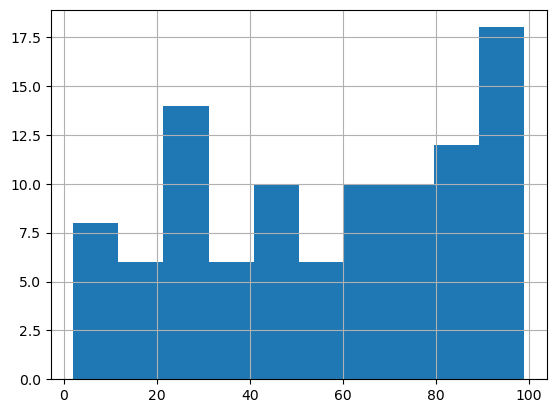

In [3]:
dog_pack["height_cm"].hist()
plt.show()

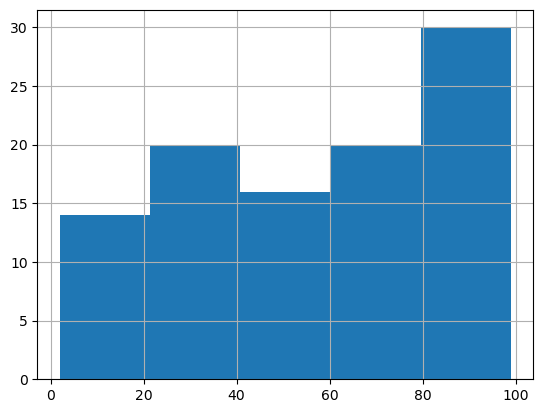

In [4]:
dog_pack["height_cm"].hist(bins=5)
plt.show()

## Bar Plots

In [5]:
avg_weight_by_breed = dog_pack.groupby("breed")["weight_kg"].mean()
print(avg_weight_by_breed)

breed
beagle              46.1
boxer               51.0
chihuahua           61.7
chow chow           50.9
dachshund           66.5
golden retriever    35.7
labrador            48.1
poodle              53.6
pug                 32.5
st. bernard         59.1
Name: weight_kg, dtype: float64


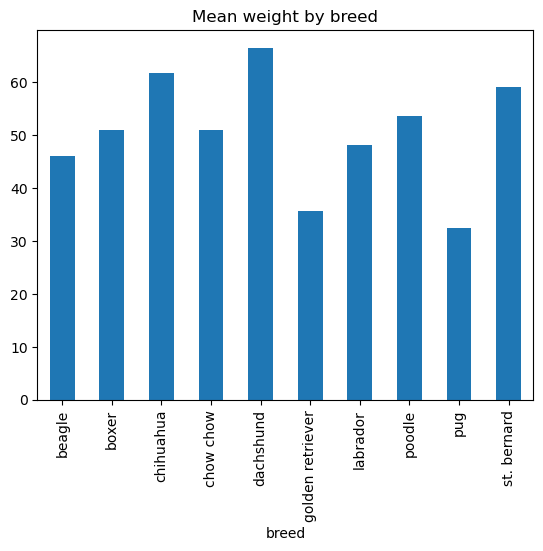

In [6]:
avg_weight_by_breed.plot(kind="bar", title="Mean weight by breed")
plt.show()

## Line Plots

In [7]:

sully = pd.DataFrame({
    "weight_kg": [random.randrange(1, 50) for _ in range(38)],
    "date": pd.date_range(start="2019-01-01", end="2019-12-31", periods=38)
})
sully.head()

,weight_kg,date
0,26,2019-01-01 00:00:00.000000000
1,40,2019-01-10 20:06:29.189189189
2,12,2019-01-20 16:12:58.378378378
3,30,2019-01-30 12:19:27.567567568
4,40,2019-02-09 08:25:56.756756757


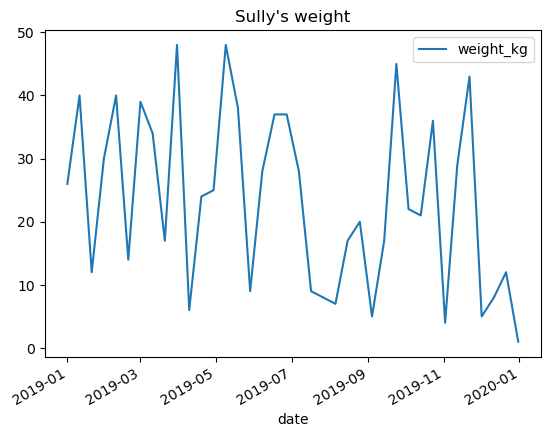

In [8]:
sully.plot(x="date", y="weight_kg", kind="line", title="Sully's weight")
plt.show()

## Scatter Plots

c:\Users\Edwin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


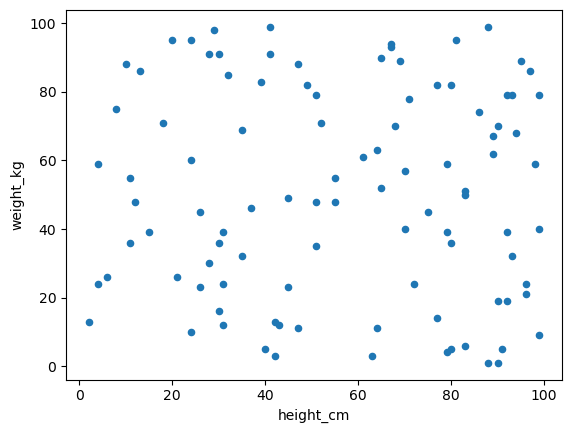

In [9]:
dog_pack.plot(x="height_cm", y="weight_kg", kind="scatter")
plt.show()

## Layering Plots

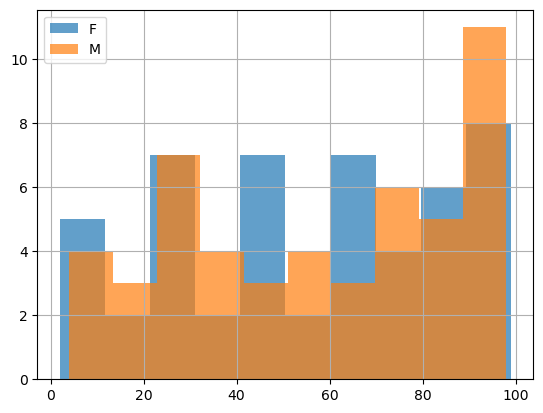

In [10]:
dog_pack[dog_pack["sex"]=="F"]["height_cm"].hist(alpha=0.7)
dog_pack[dog_pack["sex"]=="M"]["height_cm"].hist(alpha=0.7)
plt.legend(["F", "M"])
plt.show()

# Missing Values

In [11]:
avocados = pd.read_pickle("avoplotto.pkl")
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [12]:
avocados_2016 = avocados[avocados["year"]==2016]
avocados_2016.head()

,date,type,year,avg_price,size,nb_sold
52,2016-12-25,conventional,2016,1.00,small,9255125.20
53,2016-12-18,conventional,2016,0.96,small,9394065.91
54,2016-12-11,conventional,2016,0.98,small,9009996.11
55,2016-12-04,conventional,2016,1.00,small,11043350.90
56,2016-11-27,conventional,2016,1.21,small,7891487.94


In [13]:
avocados_2016.isna().any()

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool

In [14]:
avocados_2016.isna().sum()

date         0
type         0
year         0
avg_price    0
size         0
nb_sold      0
dtype: int64

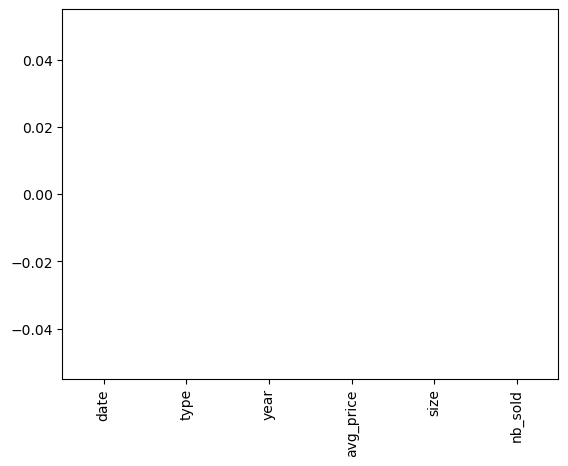

In [15]:
avocados_2016.isna().sum().plot(kind="bar")
plt.show()

## Replacing missing values

In [16]:
# avocados_2016.dropna() 

In [17]:
avocados_2016.fillna(0)

,date,type,year,avg_price,size,nb_sold
52,2016-12-25,conventional,2016,1.00,small,9255125.20
53,2016-12-18,conventional,2016,0.96,small,9394065.91
54,2016-12-11,conventional,2016,0.98,small,9009996.11
55,2016-12-04,conventional,2016,1.00,small,11043350.90
56,2016-11-27,conventional,2016,1.21,small,7891487.94
...,...,...,...,...,...,...
944,2016-01-31,organic,2016,1.43,extra_large,5515.91
945,2016-01-24,organic,2016,1.41,extra_large,12933.97
946,2016-01-17,organic,2016,1.44,extra_large,13106.29
947,2016-01-10,organic,2016,1.35,extra_large,8771.79
